In [6]:
import csv

### READING CSV FILES

def read_csv(filename):
    t = []
    data = []
    with open(filename) as f:
    # open the csv file
        reader = csv.reader(f)
        for row in reader:
            # read the rows 1 one by one
            t.append(float(row[0])) # leftmost column
            data.append(float(row[1])) # second column
    return t, data

tA, dataA = read_csv('sigA.csv')
tB, dataB = read_csv('sigB.csv')
tC, dataC = read_csv('sigC.csv')
tD, dataD = read_csv('sigD.csv')

# for i in range(len(tA)):
    # print the data to verify it was read
#     print(str(tA[i]) + ", " + str(dataA[i]))

In [ ]:
import matplotlib.pyplot as plt # for plotting

### PLOTTING SIGNALS

def plot_signals(t, data, title, color, shape, markersize):
    plt.plot(t, data, color+shape, markersize = markersize)
    plt.xlabel('Time [s]')
    plt.ylabel('Signal')
    plt.title(title)
    plt.show()
    
plot_signals(tA, dataA, 'Signal A vs Time', 'b', '-*', markersize = 1)
plot_signals(tB, dataB, 'Signal B vs Time', 'g', '-*', markersize = 1)
plot_signals(tC, dataC, 'Signal C vs Time', 'r', '-*', markersize = 1)
plot_signals(tD, dataD, 'Signal D vs Time', 'y', '-*', markersize = 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### PLOTTING FFT

def plot_fft(sample_rate, t, data, title, color):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(t,y,color)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    ax2.loglog(frq,abs(Y),color) # plotting the fft
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    fig.suptitle(title)
    plt.show()

    
plot_fft(10000, tA, dataA, 'Signal A', 'b')
plot_fft(10000, tB, dataB, 'Signal B', 'g')
plot_fft(10000, tC, dataC, 'Signal C', 'r')
plot_fft(10000, tD, dataD, 'Signal D', 'y')

In [ ]:
### MOVING AVERAGE FILTER

def calc_maf(t, data, x):
    data_maf = [] # empty array to store maf values
    t_maf = [] # empty array to store trimmed t range
    for i in range(len(t) - x + 1):
        maf = sum(data[i:i+x])/x
        data_maf.append(maf)
        t_maf.append(t[i + x - 1])
    return t_maf, data_maf

def plot_maf(t, data, t_maf, data_maf, title):
    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(t,data, 'k')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    ax2.plot(t_maf,data_maf, 'r')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Amplitude')
    
    fig.suptitle(title)
    plt.show()
    
def plot_fft_maf(sample_rate, t, data, t_maf, data_maf, title):
    Fs = sample_rate # sample rate
    Ts = 1.0/Fs; # sampling interval
    ts = np.arange(0,t[-1],Ts) # time vector
    y = data # the data to make the fft from
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/Fs
    frq = k/T # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range
    Y = np.fft.fft(y)/n # fft computing and normalization
    Y = Y[range(int(n/2))]
    
    ts_maf = np.arange(0,t_maf[-1],Ts) # time vector
    y_maf = data_maf # the data to make the fft from
    n_maf = len(y_maf) # length of the signal
    k_maf = np.arange(n_maf)
    T_maf = n_maf/Fs
    frq_maf = k_maf/T_maf # two sides frequency range
    frq_maf = frq_maf[range(int(n_maf/2))] # one side frequency range
    Y_maf = np.fft.fft(y_maf)/n_maf # fft computing and normalization
    Y_maf = Y_maf[range(int(n_maf/2))]

    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    ax1.loglog(frq,abs(Y),'k') # plotting the fft for unfiltered data
    ax1.set_xlabel('Freq (Hz)')
    ax1.set_ylabel('|Y(freq)|')
    
    ax2.loglog(frq_maf,abs(Y_maf),'r') # plotting the fft for MAF
    ax2.set_xlabel('Freq (Hz)')
    ax2.set_ylabel('|Y(freq)|')
    
    fig.suptitle(title)
    plt.show()

tA_maf, dataA_maf = calc_maf(tA, dataA, 2000)
plot_maf(tA, dataA, tA_maf, dataA_maf, 'Signal A: MAF with 2000 sample window')
plot_fft_maf(10000, tA, dataA, tA_maf, dataA_maf, 'Signal A')

tB_maf, dataB_maf = calc_maf(tB, dataB, 1500)
plot_maf(tB, dataB, tB_maf, dataB_maf, 'Signal B: MAF with 1500 sample window')
plot_fft_maf(10000, tB, dataB, tB_maf, dataB_maf, 'Signal B')

tC_maf, dataC_maf = calc_maf(tC, dataC, 50)
plot_maf(tC, dataC, tC_maf, dataC_maf, 'Signal C: MAF with 50 sample window')
plot_fft_maf(10000, tC, dataC, tC_maf, dataC_maf, 'Signal C')

tD_maf, dataD_maf = calc_maf(tD, dataD, 700)
plot_maf(tD, dataD, tD_maf, dataD_maf, 'Signal D: MAF with 700 sample window')
plot_fft_maf(10000, tD, dataD, tD_maf, dataD_maf, 'Signal D')

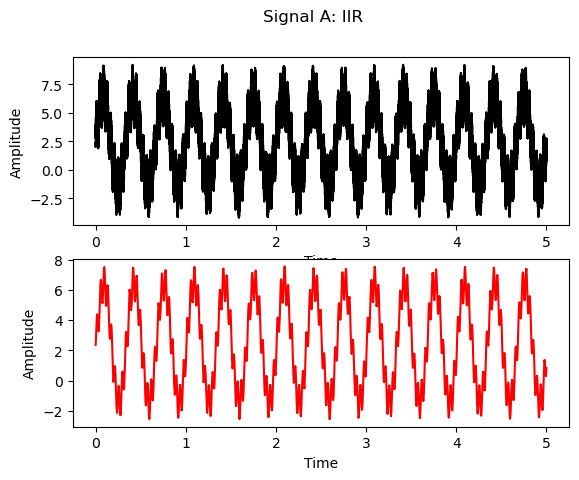

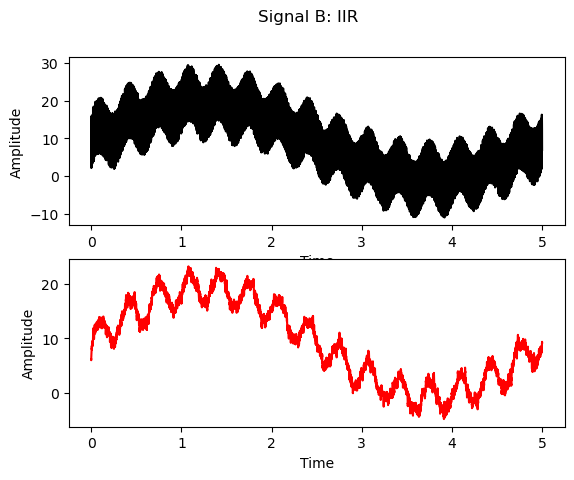

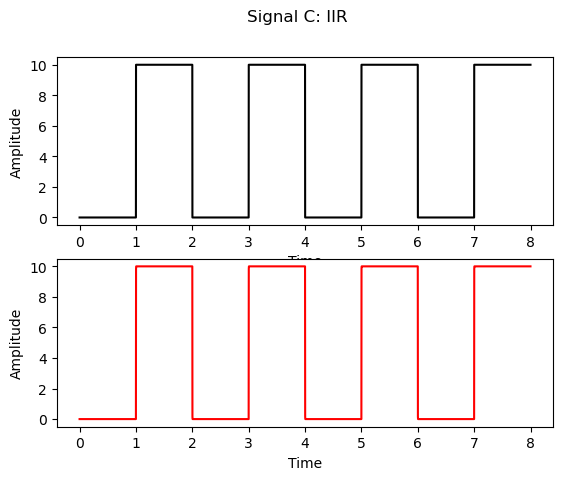

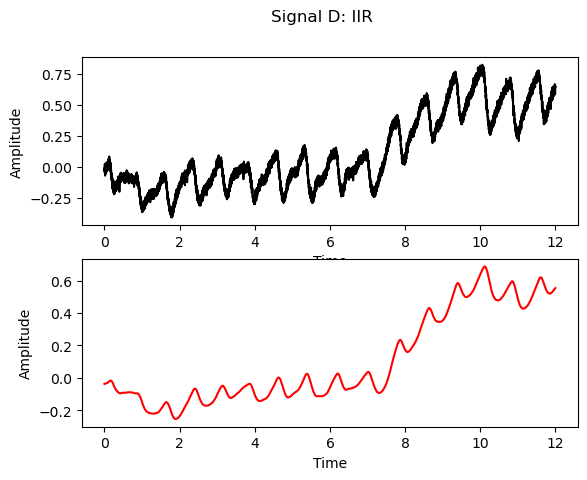

In [53]:
### INFINITE IMPULSE RESPONSE

def calc_iir(t, data, a, b):
    data_iir = [data[0]] # empty array to store iir values
    for i in range(1, len(t)):
        iir = a*data_iir[i-1] + b*data[i]
        data_iir.append(iir)
    return data_iir

def plot_iir(t, data, data_iir, title):
    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(t,data, 'k')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Amplitude')
    
    ax2.plot(t,data_iir, 'r')
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Amplitude')
    
    fig.suptitle(title)
    plt.show()

a_A = 0.99
b_A = 1 - a_A
dataA_iir = calc_iir(tA, dataA, a_A, b_A)
plot_iir(tA, dataA, dataA_iir, 'Signal A: IIR')

a_B = 0.95
b_B = 1 - a_B
dataB_iir = calc_iir(tB, dataB, a_B, b_B)
plot_iir(tB, dataB, dataB_iir, 'Signal B: IIR')

a_C = 0.5
b_C = 1 - a_C
dataC_iir = calc_iir(tC, dataC, a_C, b_C)
plot_iir(tC, dataC, dataC_iir, 'Signal C: IIR')

a_D = 0.99
b_D = 1 - a_D
dataD_iir = calc_iir(tD, dataD, a_D, b_D)
plot_iir(tD, dataD, dataD_iir, 'Signal D: IIR')